# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования: провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.
План работы:
 - Ознакомиться с данными;
 - Предобработка пропущенных значений, аномалий;
 - Добавление новых столбцов;
 - Исследовательский анализ данных, выявлений закономерностей, зависимостей, вычисление корелляций;
 - Вывод.

### Откройте файл с данными и изучите общую информацию. 

**Откроем и изучим информацию о датасете.**

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открываем датасет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

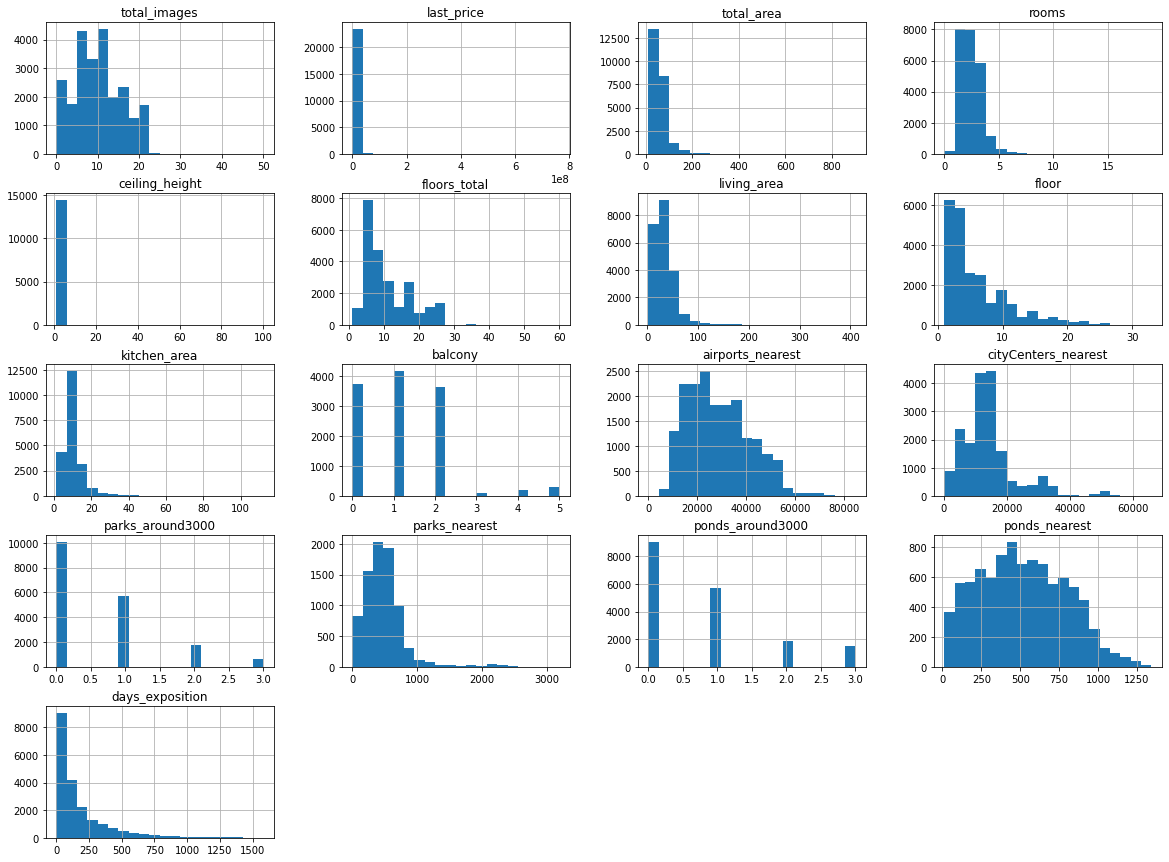

In [2]:
display(data)          #краткая сводка
data.hist(bins=20, figsize=(20,15)) #строим гистограмму

In [3]:
data.info() #смотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Видим датасет из 23699 строк, с 21 колонкой с различным типом данных: bool(2), float64(14), int64(3), object(3).
Изменим впоследствии тип данных у нескольких колонок: 
-переведём 'floors_total', 'parks_around3000', 'ponds_around3000', 'days_exposition', 'balcony' в int;
-переведём 'is_apartment' - в булевые; 
-'first_day_exposition' в формат даты.**

**Вывод.** 

**Наблюдаются некие аномалии на гистограммах, например присутствуют белые пятна, в некоторых данных достаточно большой разброс, выглядят странно показатели для 'last_price', слились в один столбец. Стоит изменить тип данных у некоторых столбцов для удобства и дальнейшего преобразования, нужно проверить правдоподобность пиков для разных столбцов во время исследовательского анализа, постараться исключить выбросы, которые могут сильно исказить результаты.
В то же время уже сейчас можно выделить несколько зависимостей: метраж кухни в основной массе составляет от 5 до 15 метров, практически у всех объектов есть доступ к паркам и водоёмам, больше всего объявлений в зданиях до 10 этажей, объявлений с заявленным количеством комнат больше 5 очень мало. Большая доля недвижимости с жилой площадью не больше 70 квадратных метров.**

### Предобработка данных

In [4]:
data.isna().sum().sort_values(ascending=False) #находим столбцы с пропусками

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Изменим тип данных в столбцах и заполним пропуски где сможем, удалим пропущенные строки в 'locality_name' и 'floors_total'.**

**Проверим данные на явные дубликаты.**

In [5]:
len(data[data.duplicated()])

0

In [6]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int') #допустим, что если балкон не указан, то его нет
data = data.dropna(subset=['locality_name','floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #меняем тип данных из object в date_time

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False) #изменим тип данных для 'is_apartment'
data['is_apartment'] = data['is_apartment'].astype('bool')
#не можем узнать природу пропусков в значениях парках и водоёмов, оставим пропуски там как есть


**Заполним пропуски в 'ceiling_height' медианным значением по этажам.**

In [9]:
len(data.query('ceiling_height < 5 and ceiling_height >= 2.4')) #выберем интервал с максимальным количеством данных, обрежем верхние и нижние аномалии
ceiling_height = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height)

**Обработаем пропуски в столбце 'living_area', заполним медианным значением по комнатам.**

In [10]:
data['living_area_procent'] = round(data['living_area'] / data['total_area'], 2)
data.groupby('rooms')['living_area_procent'].agg(['median', 'count'])

,median,count
rooms,,
0,0.69,183
1,0.48,7358
2,0.59,7265
3,0.63,5339
4,0.66,1082
5,0.65,292
6,0.68,98
7,0.68,53
8,0.69,12


In [11]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area_procent'] = \
    data.loc[(data['rooms'] == t), 'living_area_procent'].median() 
data['living_area'] = data['living_area_procent'] * data['total_area']

In [12]:
len(data)

23565

**Обработаем столбец 'kitchen_area' аналогично предыдущему пункту.**

In [13]:
data['k_area_procent'] = round(data['kitchen_area'] / data['total_area'], 2)
data.groupby('rooms')['k_area_procent'].agg(['median', 'count'])

,median,count
rooms,,
0,NaN,0
1,0.250,7195
2,0.160,7257
3,0.130,5356
4,0.110,1075
5,0.110,285
6,0.100,96
7,0.080,52
8,0.110,9


In [14]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'k_area_procent'] = \
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].notna()), 'k_area_procent'].median() 
data['kitchen_area'] = data['k_area_procent'] * data['total_area']

**Не можем узнать природу пропусков в значениях парках и водоёмов, оставим пропуски там как есть, природа пропусков в 'airports_nearest' и 'cityCenters_nearest' скорее всего случайна, значения были получены автоматически на основе картографических данных, 'days_exposition' тоже оставим, так как не можем узнать когда выкладывали то или иное объявление.**

**Обработаем столбец 'locality_name'.**

In [15]:
data['locality_name'].value_counts() #находим список уникальных значений в названиях

Санкт-Петербург           15651
посёлок Мурино              520
посёлок Шушары              439
Всеволожск                  398
Пушкин                      369
                          ...  
деревня Котлы                 1
посёлок Петро-Славянка        1
поселок Пчевжа                1
поселок Ромашки               1
поселок Красносельское        1
Name: locality_name, Length: 364, dtype: int64

In [16]:
data['locality_name'] = (data['locality_name'] #убираем дубликаты в названиях населённых пунктов
    .str.replace('ё', 'е')
    .replace(['поселок Рябово'], 'поселок городского типа Рябово', regex=True)
)
data['locality_name'].value_counts() #проверяем, положительная динамика присутствует

Санкт-Петербург                    15651
поселок Мурино                       552
поселок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Иссад                          1
поселок Платформа 69-й километр        1
деревня Тихковицы                      1
деревня Реброво                        1
деревня Кривко                         1
Name: locality_name, Length: 329, dtype: int64

In [17]:
#приводим посёлки к одному виду
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа имени', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('село ', 'поселок ')
data['locality_name'] = data['locality_name'].str.replace('поселок поселок', 'поселок')
#
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')   
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово') 
data['locality_name'] = data['locality_name'].str.replace('поселок Никольское', 'Никольское') 
data['locality_name'] = data['locality_name'].str.replace('деревня Гарболово', 'поселок Гарболово')

In [18]:
data['locality_name'].value_counts() #положительная динамика присутствует

Санкт-Петербург                    15651
Мурино                               586
Кудрово                              470
поселок Шушары                       439
Всеволожск                           398
                                   ...  
поселок Свирьстрой                     1
деревня Снегиревка                     1
поселок Платформа 69-й километр        1
деревня Русско                         1
поселок Красносельское                 1
Name: locality_name, Length: 311, dtype: int64

In [19]:
len(data)

23565

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
data['average_price'] = data['last_price'] / data['total_area'] #создаём новый столбец цена одного квадратного метра и округляем
data['average_price'] = round(data['average_price'],2)

In [21]:
data['week_day'] = data['first_day_exposition'].dt.day_name()  # добавим день недели публикации объявления
data['month_of_exposition'] = data['first_day_exposition'].dt.month_name() # добавим месяц публикации объявления
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавим год публикации объявления

In [22]:
data['city_centre_km'] = round(data['cityCenters_nearest'] / 1000) #добавим расстояние до центра города в километрах

In [23]:
def floor_rec(floor, floors_total): #функция для определения типа этажа
    if floor == 1:
        return 'первый'
    elif floor == floors_total and floor != 1:
        return 'последний'
    else:
        return 'другой'
    #применение функции к датасету
data['floor_type'] = data.apply(lambda x: floor_rec(x['floor'], x['floors_total']), axis=1) 

### Проведите исследовательский анализ данных

**4.1.1. Рассмотрим метрику по общей площади.**

In [24]:
len(data['total_area'])

23565

In [25]:
len(data.loc[data['total_area'] < 100])

21674

In [26]:
len(data.loc[data['total_area'] < 50])

10886

In [27]:
data.sort_values('total_area', ascending=True).head(5) #cмотрим нижние значения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_procent,k_area_procent,average_price,week_day,month_of_exposition,year_of_exposition,city_centre_km,floor_type
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,9.960,2,False,...,45.0,200.0,0.83,0.25,200000.00,Wednesday,July,2017,1.0,другой
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,6.240,1,False,...,185.0,410.0,0.48,0.25,107692.31,Sunday,December,2017,16.0,первый
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,6.240,2,False,...,NaN,24.0,0.48,0.25,142307.69,Monday,March,2019,5.0,другой
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5,10.010,3,False,...,27.0,9.0,0.77,0.25,292307.69,Wednesday,July,2018,1.0,другой
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5,6.336,1,False,...,155.0,19.0,0.48,0.25,127727.27,Monday,December,2018,4.0,первый


In [28]:
len(data.loc[(data['total_area'] < 300) & (data['total_area'] > 200), 'total_area'])

163

In [29]:
len(data.loc[data['total_area'] > 300])

61

<AxesSubplot:>

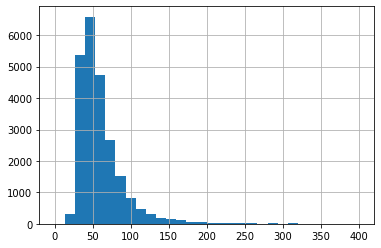

In [30]:
data['total_area'].hist(bins=30, range=(0,400))

**Благодаря логической индексации посчитаем объявления с метражём: 
-до 100 квадратных метров: составляют 92% от всех
-до 50 квадратных метров: составляют 46% от всех
-от 200 до 300 квадратных метров: представлено 163 объявления
-от 300 метров и больше: 61 объявление** 

**Сохраним в датасет только объявления до 400 квадратных метров, так как они составляют 99% всей строк, основные закономерности мы увидим оттуда. По нижней границе аномалий не обнаружил, метраж меньше 10 не встречается, от 10 до 20 могут быть студии.** 

In [31]:
data = data.loc[data['total_area'] <= 400]

**4.1.2. Рассмотрим метрику по жилой площади.**

<AxesSubplot:>

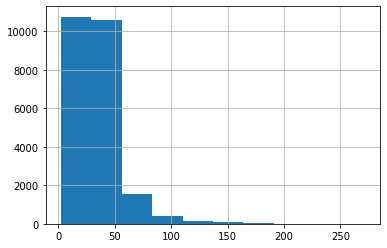

In [32]:
data['living_area'].hist()

In [33]:
len(data.loc[data['living_area'] >= 200])

23

**Видим пик на значениях от 20 до 40, 88% объявлений имеют значения до 70 квадратных метров, больше 200 квадратных метров встречается 23 объявления, обрежем их, чтобы сгладить данные.**

In [34]:
data = data.loc[data['living_area'] <= 200]

**Рассмотрим связь между жилой площадью и общей.**

Корреляция между жилой и общей площадью равна: 0.9396510757108201


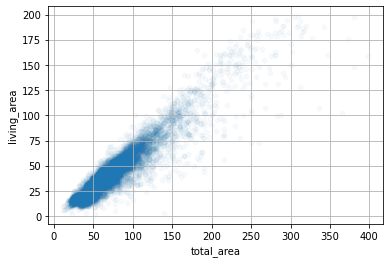

In [35]:
data.plot(x='total_area', y='living_area', kind = 'scatter', alpha=0.03, grid=True)
print('Корреляция между жилой и общей площадью равна:', data['living_area'].corr(data['total_area']))

**Как и ожидалось наблюдается положительная корреляция между площадями, с ростом общей, растёт и метраж второй. Из диаграммы рассеяния видим облако преобладающих объявлений в интервалах, которые мы рассмотрели выше.**

**4.1.3. Рассмотрим метрику по кухонной площади**

In [36]:
len(data['kitchen_area'])

23519

In [37]:
len(data.loc[data['kitchen_area'] > 50])

38

In [38]:
len(data.loc[data['kitchen_area'] <= 25])

22757

In [39]:
len(data.loc[(data['kitchen_area'] > 3) & (data['kitchen_area'] <= 15), 'kitchen_area'])

20657

**Меньше 25 метров кухонной площади имеют 97% оставшихся объявлений, обрежем те, что , больше 50 и меньше 3.**

In [40]:
data = data.loc[(data['kitchen_area'] <= 50) & (data['kitchen_area'] > 3)]

<AxesSubplot:>

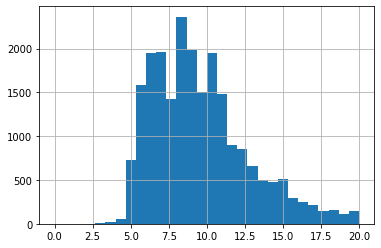

In [41]:
data['kitchen_area'].hist(bins=30, range=(0,20))

<AxesSubplot:>

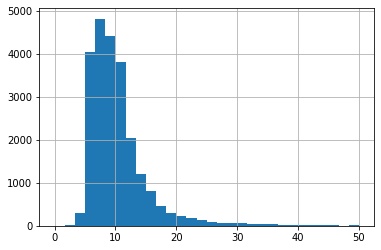

In [42]:
data['kitchen_area'].hist(bins=30, range=(0,50))

**Из метрики видим 2 пика: преобладают квартиры с планировкой где кухни занимают от 6 до 11 метров, от 15 до 25 "квадратов" занимают кухни меньше чем в 10% оставшихся объявлений, от 5 до 15 квадратных метров занимают кухни в 88%, можно проследить определённую зависимость. Рассмотрим диаграммы рассеяния между кухонной площадью и общей.**

Корреляция между жилой и общей площадью равна: 0.597227147403405


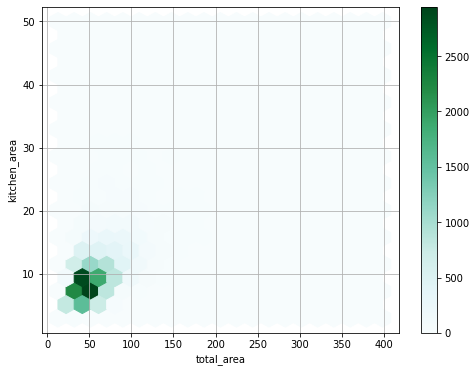

In [43]:
data.plot(x='total_area', y='kitchen_area', kind = 'hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
print('Корреляция между жилой и общей площадью равна:', data['kitchen_area'].corr(data['total_area']))

**Видим облако преобладающих значений: в самой густой зоне квартиры с метражём от 25 до 50 квадратов, с кухней от 5 до 11 квадратов, зависимость есть, но она меньше чем у жилой площади от общей.**

**4.1.4. Рассмотрим метрику по цене на момент снятия с публикации**

<AxesSubplot:>

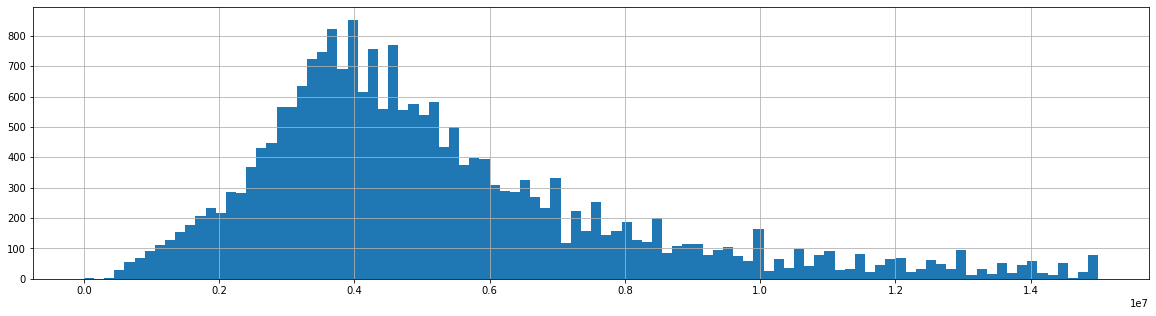

In [44]:
data['last_price'].hist(bins=100, figsize=(20,5), range=(0,15000000))

**Отсеем по верхней границе аномальные значения.**

In [45]:
len(data['last_price'])

23274

In [46]:
data.sort_values('last_price', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_procent,k_area_procent,average_price,week_day,month_of_exposition,year_of_exposition,city_centre_km,floor_type
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.000,5,False,...,285.0,233.0,0.50,0.21,1736842.11,Wednesday,April,2018,1.0,другой
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.750,6,False,...,188.0,NaN,0.34,0.16,1542604.80,Tuesday,March,2019,1.0,последний
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.848,4,False,...,140.0,249.0,0.64,0.10,857542.88,Monday,April,2017,6.0,другой
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,131.320,7,False,...,198.0,901.0,0.49,0.15,712201.49,Friday,March,2016,5.0,другой
19155,20,160000000.0,243.0,2018-11-12,5,2.65,5,145.800,4,False,...,200.0,18.0,0.60,0.14,658436.21,Monday,November,2018,1.0,другой


**Уберём самое большое значение, как завышенное.**

In [47]:
data = data.loc[data['last_price'] <= 100000000]

In [48]:
len(data.loc[data['last_price'] <= 15000000])

22160

In [49]:
len(data.loc[(data['last_price'] > 3000000) & (data['last_price'] <= 7000000), 'last_price'])

13941

**Цена 97% объявлений на момент снятия была до 15 миллионов. Больше всего продавали квартиры в диапазоне от 3 до 7 миллинов (63%).**

**4.1.5. Рассмотрим данные по количеству комнат.**

In [50]:
len(data['rooms'])

23254

In [51]:
len(data.loc[data['rooms'] <= 3])

21638

<AxesSubplot:>

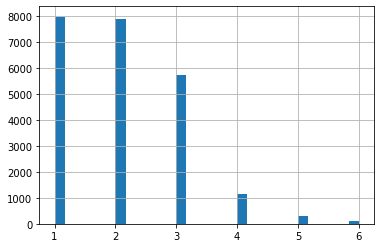

In [52]:
data['rooms'].hist(bins=30, range=(1, 6))

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='rooms'>

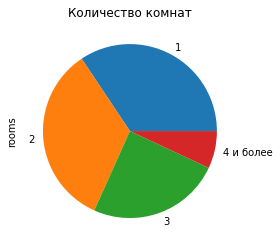

In [53]:
data['rooms'].where(data['rooms'] < 4, '4 и более').value_counts().plot(kind='pie', title='Количество комнат')

**Как видим, 95 процентов квартир с планировкой от 1 до 3 комнат, однушки и двушки самые продаваемые объекты недвижимости.**

**4.1.6. Рассмотрим данные по высоте потолков.**

In [54]:
len(data['ceiling_height'])

23254

In [55]:
len(data.loc[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] <= 2.8), 'ceiling_height'])

20222

<AxesSubplot:>

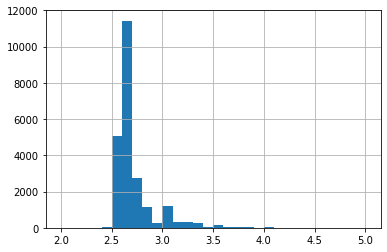

In [56]:
data['ceiling_height'].hist(bins=30, range=(2,5))

**Видим в основе преобладания значений высоты потолков от 2.4 до 2.8 (87%).**

**4.1.7. Рассмотрим метрику по тип этажа квартиры («первый», «последний», «другой»).**

In [57]:
len(data['floor_type'])

23254

In [58]:
data['floor_type'].value_counts()

другой       17083
последний     3288
первый        2883
Name: floor_type, dtype: int64

<AxesSubplot:ylabel='floor_type'>

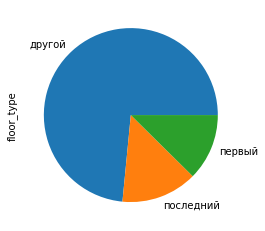

In [59]:
data['floor_type'].value_counts().plot(kind='pie')

**Тип этажа "другой" встречается в 74% объявлений, "первый" и "последний примерно поровну".**

**4.1.8. Рассмотрим данные по общему количеству этажей в доме.**

In [60]:
len(data['floors_total'])

23254

In [61]:
data.loc[data['floors_total'] <= 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_procent,k_area_procent,average_price,week_day,month_of_exposition,year_of_exposition,city_centre_km,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,50.7600,8,False,...,755.0,NaN,0.47,0.23,120370.37,Thursday,March,2019,16.0,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.5840,1,False,...,NaN,81.0,0.46,0.27,82920.79,Tuesday,December,2018,19.0,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.1600,4,False,...,574.0,558.0,0.61,0.15,92785.71,Thursday,August,2015,14.0,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,100.1700,9,False,...,234.0,424.0,0.63,0.13,408176.10,Friday,July,2015,7.0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0000,13,False,...,48.0,121.0,0.32,0.41,100000.00,Tuesday,June,2018,8.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.5955,3,False,...,381.0,NaN,0.55,0.10,72490.85,Tuesday,March,2017,4.0,другой
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,37.7600,4,False,...,NaN,45.0,0.64,0.14,52542.37,Monday,January,2018,NaN,другой
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.4840,1,False,...,NaN,NaN,0.52,0.16,44091.71,Sunday,February,2018,NaN,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,45.2825,12,False,...,196.0,602.0,0.59,0.30,149511.40,Tuesday,March,2017,10.0,другой


In [62]:
print(data.loc[data['floors_total'] == 5])
print(data.loc[data['floors_total'] == 9])

       total_images  last_price  total_area first_day_exposition  rooms  \
2                10   5196000.0       56.00           2015-08-20      2   
11                9   3300000.0       44.00           2018-08-27      2   
12               10   3890000.0       54.00           2016-06-30      2   
13               20   3550000.0       42.80           2017-07-01      2   
16               11   6700000.0       82.00           2017-11-23      3   
...             ...         ...         ...                  ...    ...   
23690             3   5500000.0       52.00           2018-07-19      2   
23692             2   1350000.0       30.00           2017-07-07      1   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
2                2.65

<AxesSubplot:>

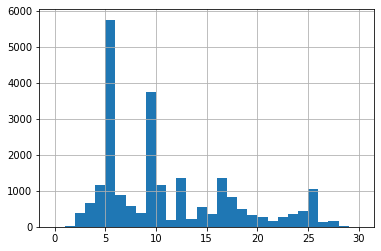

In [63]:
data['floors_total'].hist(bins = 30, range=(0,30))

**42% квартир из данных имеют 5 или 9 этаж, 99% имеют этажность меньше 30, 89% этажность меньше 20. Можно отметить несколько пиков между 10 и 15, 15 и 20, и 5, 10, 25.**

**4.1.9. Изучим данные по расстоянию до центра города в метрах.**

In [64]:
len(data.loc[(data['cityCenters_nearest'] >10000) & (data['cityCenters_nearest'] <= 20000), 'cityCenters_nearest'])

10295

In [65]:
len(data.loc[(data['cityCenters_nearest'] > 0)])

17836

<AxesSubplot:>

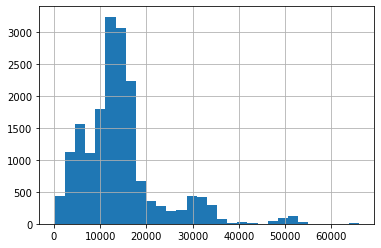

In [66]:
data['cityCenters_nearest'].hist(bins=30)

**Из-за пропусков в значениях дальности от центра в 4587 объявлениях, расммотрим зависимость в оставшихся данных, рассмотрим промежуток до 100км. Основная масса квартир находится в диапазоне до 20 000 метров от центра города, дальше располагаются 15%. Пик между 10000 и 20000, на них приходится 58%.**

**4.1.10. Рассмотрим данные по расстоянию до ближайшего парка.**

In [67]:
len(data.loc[data['parks_nearest'] > 0])

7928

In [68]:
len(data.loc[(data['parks_nearest'] > 250) & (data['parks_nearest'] <= 750)])

5441

<AxesSubplot:>

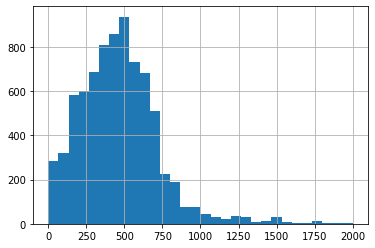

In [69]:
data['parks_nearest'].hist(bins=30, range=(0,2000))

**Как и в предыдущем пункте в этом столбце столкнулись со случайными пропусками, работаем с тем что есть, 99% из респондентов располагаются до 2000 метров от парка, пик на отметке 500 метров, на расстоянии от 250 метров до 750 располагаются 69% квартир.**

**4.2.1. Изучим, как быстро продавались квартиры (столбец days_exposition).**

In [70]:
data['days_exposition'].describe()

count    20119.000000
mean       180.930464
std        219.745848
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

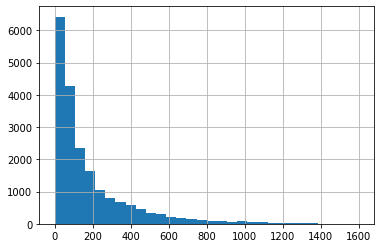

In [71]:
data['days_exposition'].hist(bins=30, range=(0,1600))

<AxesSubplot:>

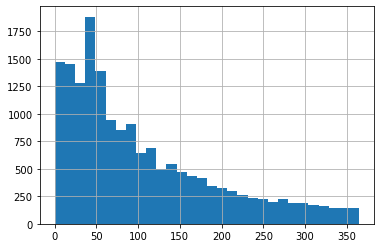

In [72]:
data['days_exposition'].hist(bins=30, range=(0,365))

**Среднее время продажи занимает 180 дней, половина объявлений уходит за срок менее 100 дней. Опираясь на верхний и нижний квартили, отмечаем явные пики на сроке 45 и 60 дней, быстрыми можно считать продажи, совершенные за 45 дней, необычно долгими - свыше 230 дней.**

<AxesSubplot:>

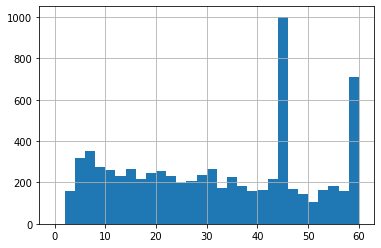

In [73]:
data['days_exposition'].hist(bins=30, range=(0,60))

<AxesSubplot:>

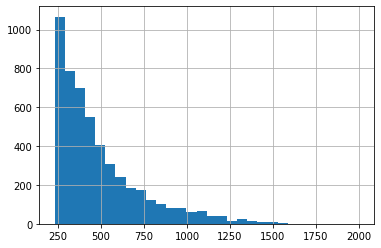

In [74]:
data['days_exposition'].hist(bins=30, range=(230, 2000))

**4.2.3. Рассмотрим какие факторы больше всего влияют на общую стоимость объекта.
Зависимость стоимости от общей площади:**

Корелляция между ценой и общей площадью равна: 0.7557335717841905


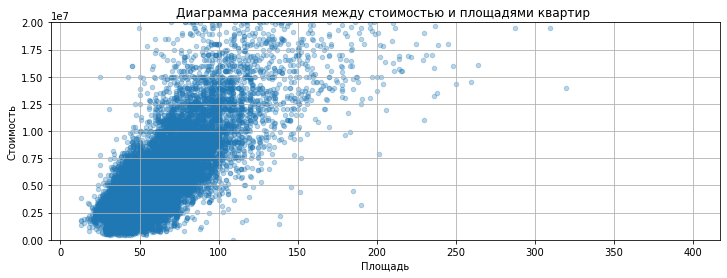

In [75]:
data.plot.scatter(
    x='total_area', y='last_price', alpha=0.3, ylim =(0,20000000),
    grid='True',  title='Диаграмма рассеяния между стоимостью и площадями квартир ', 
    xlabel='Площадь', ylabel='Стоимость', legend=False, figsize=(12,4))
print('Корелляция между ценой и общей площадью равна:', data['last_price'].corr(data['total_area']))

**Построим график средней стоимости квартир из объявлений, сгруппированных по общей площади.**

<AxesSubplot:title={'center':'Средняя стоимость квартир сгруппированных по площадям'}, xlabel='total_area', ylabel='Стоимость'>

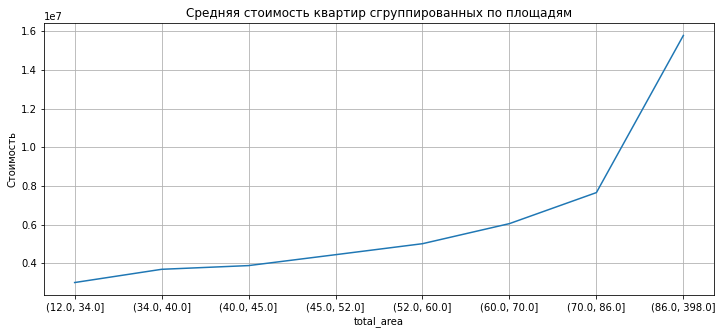

In [76]:
(data
.pivot_table(index=(pd.qcut(data['total_area'], q=8, precision=0)),
             values='last_price', aggfunc=['mean'])
.plot(grid='True', title='Средняя стоимость квартир сгруппированных по площадям',
      label='Группа площади', ylabel='Стоимость', legend=False, figsize=(12,5)))


**На диаграмме рассеяния можно заметить положительную корреляцию 0.7557385770251334, однако разброс достаточно широк, обратим внимание на другие параметры, которые могут влиять на стоимость.**

**4.2.4. Рассмотрим зависимость стоимости от жилой площади.**

Корреляция между ценой и жилой площадью равна: 0.6742297695530868


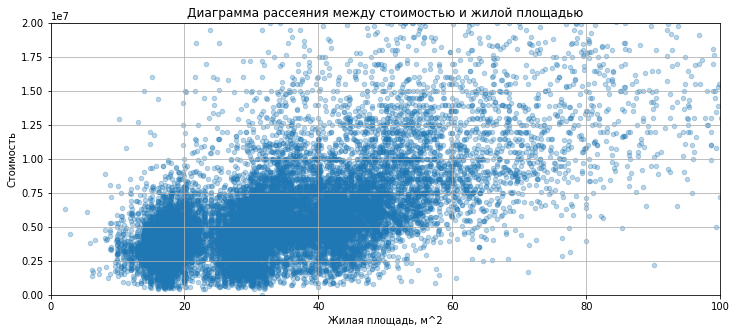

In [77]:
data.plot.scatter(
    x='living_area', y='last_price', alpha=0.30, grid='True', ylim=(0,20000000), xlim=(0,100),
    title='Диаграмма рассеяния между стоимостью и жилой площадью', xlabel='Жилая площадь, м^2', 
    ylabel='Стоимость', legend=False, figsize=(12,5))
print('Корреляция между ценой и жилой площадью равна:', data['last_price'].corr(data['living_area']))

**Построим график средней стоимости квартир из объявлений, сгруппированных по жилой площади.**

<AxesSubplot:title={'center':'Средняя стоимость квартир сгруппированных по жилой площади'}, xlabel='Группа жилой площади', ylabel='Стоимость'>

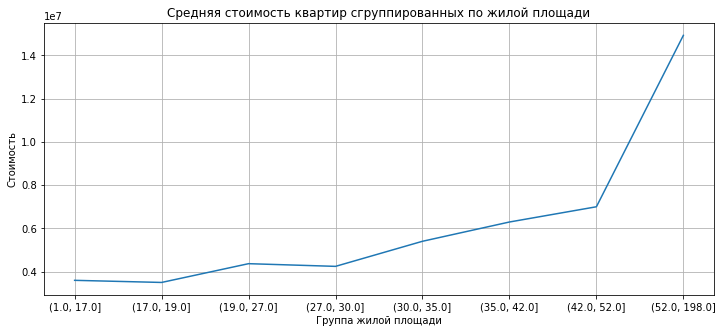

In [78]:
(data
.pivot_table(index=(pd.qcut(data['living_area'], q=8, precision=0)), values='last_price', aggfunc=['mean'])
.plot(grid='True', title='Средняя стоимость квартир сгруппированных по жилой площади', xlabel='Группа жилой площади', ylabel='Стоимость', legend=False, figsize=(12,5)))

**Корреляция здесь равна 0.6742884037596818.**

**4.2.5. Рассмотрим зависимость стоимости и кухонной площади.**

Корреляция между ценой и кухонной площадью равна: 0.5602793662331729


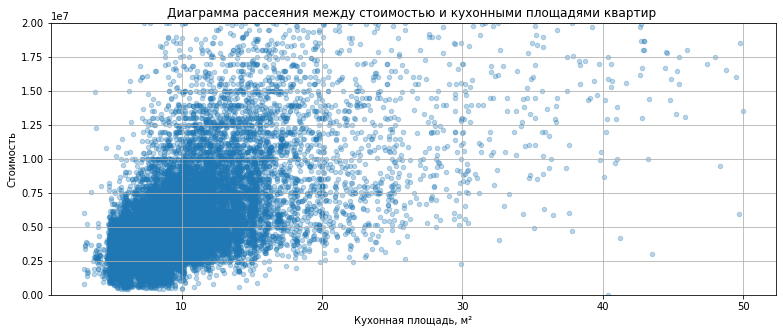

In [79]:
data.plot.scatter(
    x='kitchen_area', y='last_price', alpha=0.3, grid='True', ylim=(0,20000000), 
    title='Диаграмма рассеяния между стоимостью и кухонными площадями квартир ', xlabel='Кухонная площадь, м²', 
    ylabel='Стоимость', legend=False, figsize=(13,5))
print('Корреляция между ценой и кухонной площадью равна:', data['last_price'].corr(data['kitchen_area']))

**Положительная корреляция присутствует 0.5602896356158981, она меньше, чем в предыдущих двух случаях.**

**4.2.6. Рассмотрим зависимость цены и количества комнат.**

In [80]:
print('Квартиры, сгруппированные по комнатам')
data.pivot_table(values=['total_area'], columns='rooms', aggfunc='count')

Квартиры, сгруппированные по комнатам


rooms,1,2,3,4,5,6,7,8,9,10,11,14,16
total_area,7990,7889,5759,1151,305,96,41,10,6,3,2,1,1


Корреляция между ценой и количеством комнат равна: 0.4692351021856301


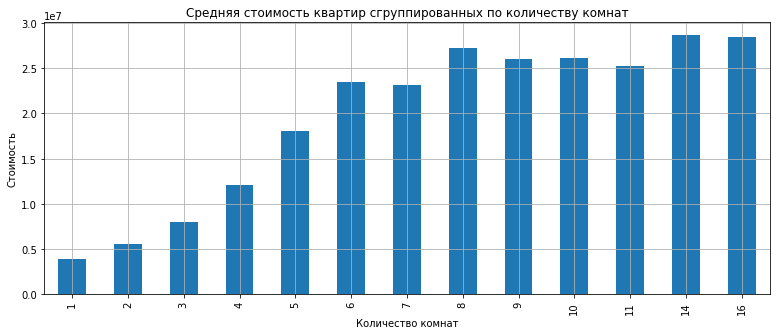

In [81]:
(data
.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
.plot(grid='True', title='Средняя стоимость квартир сгруппированных по количеству комнат', kind='bar',
      xlabel='Количество комнат', ylabel='Стоимость', legend=False, figsize=(13,5)))
print('Корреляция между ценой и количеством комнат равна:', data['last_price'].corr(data['rooms']))

**Цена зависит от количества комнат, конверсия достигает 0.4693598648325467, общая и жилая площадь влияют больше на ценообразование.**

**4.2.7.Рассмотрим зависимость цены от типа этажа объекта.**

<AxesSubplot:title={'center':'Тип этажа и усреднённая стоимость квартиры'}, xlabel='Тип этажа', ylabel='Стоимость'>

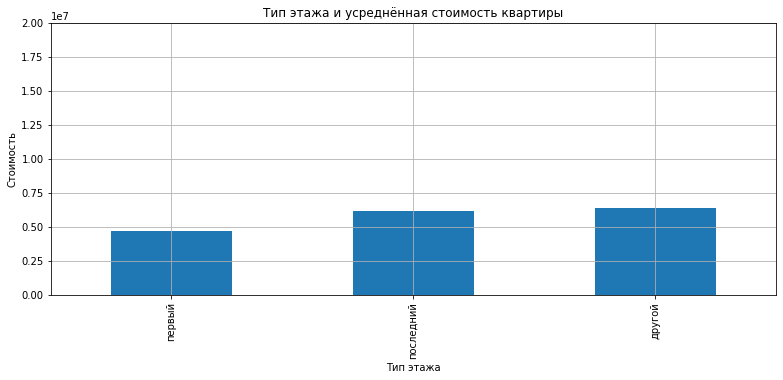

In [82]:
floor_type = ['первый', 'последний', 'другой']
(data
    .pivot_table(index='floor_type', values='last_price', aggfunc='mean').reindex(floor_type)
    .plot(grid='True', title='Тип этажа и усреднённая стоимость квартиры', xlabel='Тип этажа', kind='bar',
          ylabel='Стоимость', legend=False, figsize=(13,5), ylim=(0,20000000)))

**Посмотрим на среднее распредление стоимости квартир в 5 этажном и 16 этажном домах.**

<AxesSubplot:title={'center':'Номер этажа и усреднённая стоимость квартиры'}, xlabel='Этаж', ylabel='Стоимость'>

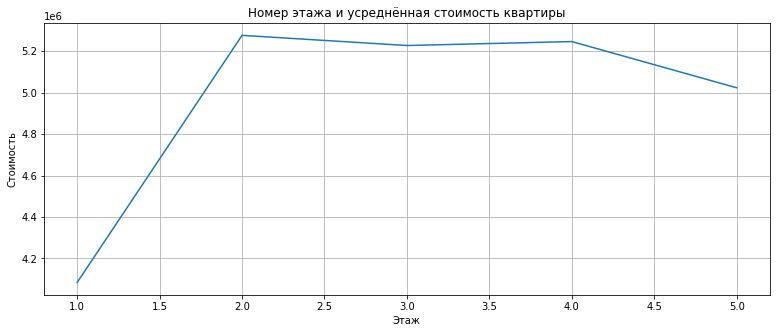

In [83]:
(data.query('floors_total == 5')
    .pivot_table(index='floor', values='last_price', aggfunc='mean')
    .plot(grid='True', title='Номер этажа и усреднённая стоимость квартиры',
        xlabel='Этаж', ylabel='Стоимость', legend=False, figsize=(13,5)))

<AxesSubplot:title={'center':'Номер этажа и усреднённая стоимость квартиры'}, xlabel='Этаж', ylabel='Стоимость, ₽'>

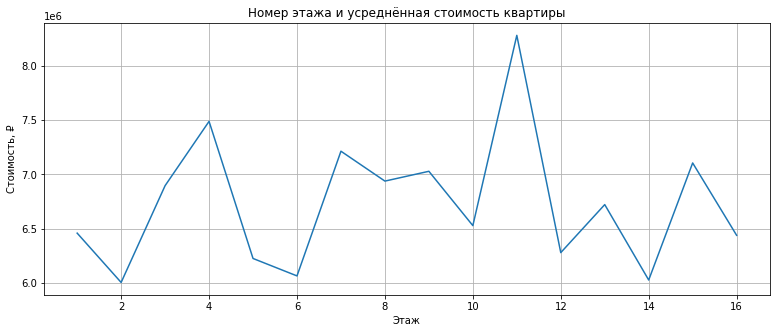

In [84]:
(data.query('floors_total == 16')
    .pivot_table(index='floor', values='last_price', aggfunc='mean')
    .plot(grid='True', title='Номер этажа и усреднённая стоимость квартиры',
        xlabel='Этаж', ylabel='Стоимость, ₽', legend=False, figsize=(13,5)))

**В среднем, квартира на первом этаже, обойдётся дешевле, чем на последнем, а та, в свою очередь, обойдётся дешевле чем квартира на "другом" этаже. При этом средняя цена на другом и последнем этаже не сильно различается.**

**4.2.8. Рассмотрим зависимость стоимости от даты публикации.**

**Для начала рассмотрим день недели.**

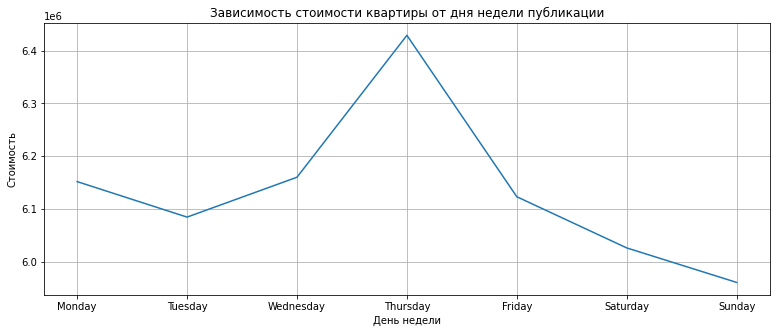

In [85]:
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(
data
    .pivot_table(index='week_day', values='last_price', aggfunc='mean').reindex(weekdays)
    .plot(grid='True', title='Зависимость стоимости квартиры от дня недели публикации',
          xlabel='День недели', ylabel='Стоимость', legend=False, figsize=(13,5))
)
print()

**Квартиры, выставленные в будни, дороже тех, что выставили на выходных, абсолютный пик наблюдается в четверг.**

**Рассмотрим месяца.**

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от месяца публикации объявления'}, xlabel='Месяц публикации', ylabel='Стоимость'>

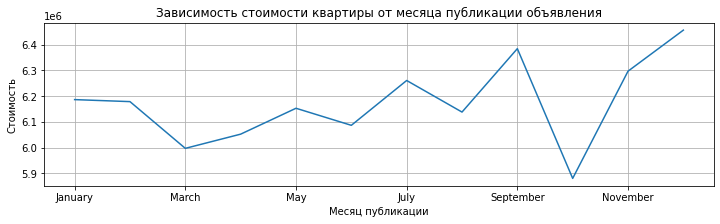

In [86]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
(
data
    .pivot_table(index='month_of_exposition', values='last_price', aggfunc='mean').reindex(months)
    .plot(grid='True', title='Зависимость стоимости квартиры от месяца публикации объявления', 
          xlabel='Месяц публикации', ylabel='Стоимость', legend=False, figsize=(12,3))
)

**Стоимость начинает расти у объявлений, которые выкладывали ближе к концу лета, потом минимум в середине осени и снова растёт.**

**Рассмотрим года, в которые выкладывали объявления.**

In [87]:
data.pivot_table(index='year_of_exposition', values='last_price', aggfunc=['mean', 'count'])

,mean,count
,last_price,last_price
year_of_exposition,,
2014,1.165435e+07,135
2015,7.631422e+06,1151
2016,6.358643e+06,2731
2017,6.080571e+06,8009
2018,5.794959e+06,8389
2019,6.435297e+06,2839


**Рассмотрим метрику с 2015 года, так как в 2014 недостаточное количество для оценки.**

<AxesSubplot:title={'center':'Зависимость стоимости квартиры от года публикации'}, xlabel='Год публикации', ylabel='Стоимость'>

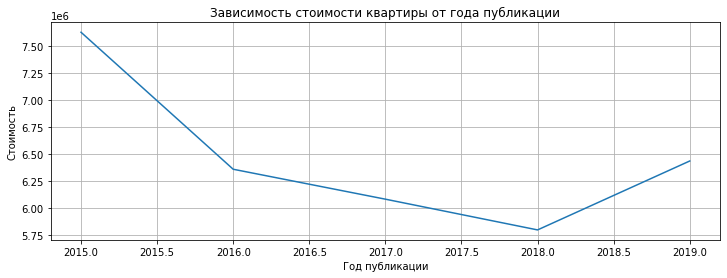

In [88]:
(data.query('year_of_exposition > 2014')
    .pivot_table(index='year_of_exposition', values='last_price', aggfunc='mean')
    .plot(grid='True', title='Зависимость стоимости квартиры от года публикации', 
          xlabel='Год публикации', ylabel='Стоимость', legend=False, figsize=(12,4)))


**Наблюдается падение средней стоимости вплоть до 2018 года, затем рост. Высокие значения в начале графика могут быть связаны с большой дельтой объявлений между 2016 и 2015 годами.**

**4.3. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов.**

In [89]:
top_10 = data.pivot_table(index='locality_name', values='average_price', aggfunc=['count', 'mean', 'median']) 
top_10 = top_10.sort_values(by=top_10.columns[0], ascending=False).head(10)

top_10.columns=['Количество','Средняя цена', 'Медианная цена']
print(top_10)

                   Количество   Средняя цена  Медианная цена
locality_name                                               
Санкт-Петербург         15432  113239.147954      104534.580
Мурино                    557   85395.768438       84968.750
Кудрово                   449   95083.103786       95185.190
поселок Шушары            435   78277.935632       76666.670
Всеволожск                392   68618.013724       65789.470
Пушкин                    364  102854.241264       99865.715
Колпино                   338   75424.579112       74723.745
поселок Парголово         323   90289.778019       91917.590
Гатчина                   307   68746.146515       67796.610
Выборг                    237   58141.909325       58158.320


**Самую дорогую недвижимость отмечаем в Санкт-Петербурге, Пушкине, Кудрово и поселке Парголово.**

**4.4. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.**

Корреляция между жилой и общей площадью равна: -0.30643562458728174


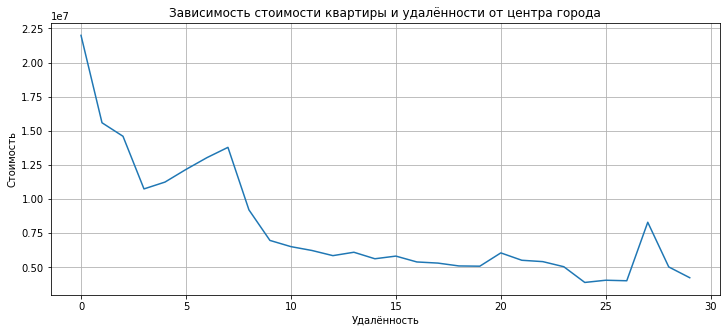

In [90]:
(
data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index =['city_centre_km'], values='last_price', aggfunc='mean')
    .plot(grid='True', title='Зависимость стоимости квартиры и удалённости от центра города', xlabel='Удалённость', ylabel='Стоимость', legend=False, figsize=(12,5))
)
print('Корреляция между жилой и общей площадью равна:', data['last_price'].corr(data['city_centre_km']))

**Присутствует отрицательная корелляция между значениями близости к центру и стоимостью квартиры -0.3062229236742538, начинается спад средней стоимости на удалении больше 7 км, дальше тип графика приближен к гиперболе, с некоторыми пиками и спадами.**

**Возможно, пики - это значения стоимости квартир в хороших районах, при прочих равных параметрах они могут создавать такую дельту по сравнению с к квартирами, которые ближе к центру, но располагаются при менее удобной инфраструктуре.**

### Общий вывод

**1)Нами были получены данные сервиса Яндекс Недвижимость с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Была поставлена задача провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.
2)Мной была проведена предобработка данных:
-заполнены пропущенные значения в столбцах parks_around3000, ponds_around3000, balcony, удалены пропущенные строки в 'locality_name' и 'floors_total';
-обрезаны значения celling_height, last_price в рамках разумных пределов, обрезаны значения не подходящие или не важные по своей немногочисленности для исследования в других столбцах;
-изменён тип данных у first_day_exposition на datetime64 для дальнейших преобразований, тип is_apartment изменён на bool;
-явные дубликаты не были выялены;
-исправлены неявные дубликаты в locality_name, произведена замена значений для лучшей выборки;
-заполнены пропущенные параметры жилой и кухонной площади по медианной по этажам.
Природа пропусков в 'airports_nearest' и 'cityCenters_nearest' скорее всего случайна, значения были получены автоматически на основе картографических данных, 'days_exposition' тоже оставим, так как не можем узнать когда выкладывали то или иное объявление.
3)Были добавлены новые столбцы:
-average_price - цена одного квадратного метра;
-week_day - день недели публикации объявления;
-month_of_exposition - месяц публикации объявления;
-year_of_exposition - год публикации объявления;
-floor_type - тип этажа квартиры;
-city_centre_km - расстояние до центра города в километрах;
-k_area_procent - коэффициент кухонной площади; 
-living_area_procent - коэффициент жилой площади.
4)Был проведён исследовательский анализ данных.
Рассмотрел метрику по площади 4.1.1.-4.1.3.:
до 100 квадратных метров: составляют 92% от всех 
-до 50 квадратных метров: составляют 46% от всех 
-от 200 до 300 квадратных метров: представлено 163 объявления 
-от 300 метров и больше: 61 объявление.
Сохранил в датасет только объявления до 400 квадратных метров, так как они составляют больше 99% всей строк, основные закономерности мы увидим оттуда.
-Видим пик жилой площади на значениях от 20 до 40 "квадратов", 88% объявлений имеют значения до 70 квадратных метров. Обрезал данные больше 200 квадратов жилой площади.
Корреляция между жилой и общей площадью равна: 0.9396510757108201
-Меньше 25 метров кухонной площади имеют 98% оставшихся объявлений, обрезал те, что выше.
Видим облако преобладающих значений: в самой густой зоне квартиры с метражём от 25 до 50 квадратов, с кухней от 5 до 11 квадратов, зависимость есть, но она меньше чем у жилой площади от общей.
Корреляция между кухонной и общей площадью равна: 0.597227147403405
-4.1.4.:
Цена 97% объявлений на момент снятия была до 15 миллионов. Больше всего продавали квартиры в диапазоне от 3 до 7 миллинов (63%).
4.1.5.:
95 процентов квартир с планировкой от 1 до 3 комнат, однушки и двушки самые продаваемые объекты недвижимости.
4.1.6.:
Видим в основе преобладания значений высоты потолков от 2.4 до 2.8 (88%).
4.1.7.:
Тип этажа "другой" встречается в 73% объявлений, "первый" и "последний примерно поровну".
4.1.8.:
42% квартир из данных имеют 5 или 9 этаж, 99.99% имеют этажность меньше 30, 89% этажность меньше 20. Можно отметить несколько пиков между 10 и 15, 15 и 20, и 5, 10, 25.
4.1.9.:
Основная масса квартир находится в диапазоне до 20 000 метров от центра города, дальше располагаются 15%. Пик между 10000 и 20000, на них приходится 58%.
4.1.10.:
99% из респондентов располагаются до 2000 метров от парка, пик на отметке 500 метров, на расстоянии от 250 метров до 750 располагаются 69 процентов квартир.
4.1.11.:
Среднее время продажи занимает 180 дней, половина объявлений уходит за срок менее 96 дней. отмечаем явные пики на сроке 45 и 60 дней, быстрыми можно считать продажи, совершенные за 45 дней, необычно долгими - свыше 230 дней.
4.2.Какие факторы больше всего влияют на общую (полную) стоимость объекта?
На диаграмме рассеяния можно заметить положительную корреляцию между ценой и общей площадью 0.7557335717841905.
Корреляция между ценой и жилой площадью равна 0.6742297695530868
Положительная корреляция присутствует 0.5602793662331729 между кухонной площадью и ценой.
Цена зависит от количества комнат, конверсия достигает 0.4692351021856301, общая и жилая площадь влияют больше на ценообразование.
В среднем, квартира на первом этаже, обойдётся дешевле, чем на последнем, а та, в свою очередь, обойдётся дешевле чем квартира на "другом" этаже.
Квартиры, выставленные в будни, дороже тех, что выставили на выходных, абсолютный пик наблюдается в четверг.
Стоимость начинает расти у объявлений, которые выкладывали ближе к концу лета-сентябре, потом минимум в середине осени, затем снова растёт.
Наблюдается падение средней стоимости с 2015 вплоть до 2018 года, затем рост.
4.3.
Самую дорогую недвижимость отмечаем в Санкт-Петербурге, Пушкине, Кудрово и посёлке Парголово.
4.4.
Присутствует отрицательная корелляция между значениями близости к центру и стоимостью квартиры -0.30848962387637896, начинается спад средней стоимости на удалении больше 7 км, дальше тип графика приближен к гиперболе, с некоторыми пиками и спадами.
5)Вывод.
Нельзя сказать, что есть какой-то один ключевой параметр влияющий на ценообразование квартиры, но, благодаря проведённому исследованию по вышеуказанной метрике, позволю себе заключить, что, более остальных, на цену влияют площадь квартиры, удалённость от местных культурных и инфраструктурных центров, а также зависит от количества комнат.**

